# **PI 4: Análisis exploratorio y evaluación de calidad de datos**

- Explorar la estructura y el contenido de los datos utilizando consultas SQL.

- Implementar análisis exploratorio complementario en Python mediante un ORM (como SQLAlchemy o psycopg2).

- Detectar valores nulos, duplicados, atípicos y otras inconsistencias.

- Identificar claves primarias y foráneas implícitas, atributos principales y variables relevantes para el negocio.

- Proponer y documentar acciones de preprocesamiento y corrección de calidad de datos.

## Explorar la estructura y el contenido de los datos utilizando consultas SQL.

In [2]:
#Importar librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#SQLAlchemy
from sqlalchemy import text, func, extract
from sqlalchemy.orm import sessionmaker

#Conexión
from db_conector import get_db_engine

try: 
    engine = get_db_engine ()
    print ("Conexión exitosa a la base de datos")
except Exception as e:
    print(f"Error al conectarse con la base de datos: {e}")


Motor de base de datos SQLAlchemy creado exitosamente para Docker (local).
Conexión exitosa a la base de datos


In [4]:
#Crear sesión 
Session = sessionmaker(bind=engine)
session = Session()

### Estructura y contenido tabla Usuarios 

In [8]:
# La tabla Usuarios almacena información de los usuarios registrados en la plataforma de e-commerce. Cada fila representa un usuario único.
sql_query = 'SELECT * FROM "Usuarios";'
df_usuarios = pd.read_sql(sql_query, engine)
df_usuarios.head()

,UsuarioID,Nombre,Apellido,dni,Email,Contraseña,FechaRegistro
0,1,Encarna,Donaire,49877134,encarna.donaire1@correo.com,Contraseña123,2025-07-20 13:38:08.843842
1,2,Jose Ignacio,Canales,98778810,joseignacio.canales2@correo.com,Contraseña123,2025-07-20 13:38:08.865956
2,3,José,Sebastián,80095714,jose.sebastian3@correo.com,Contraseña123,2025-07-20 13:38:08.866966
3,4,Priscila,Vilar,94128750,priscila.vilar4@correo.com,Contraseña123,2025-07-20 13:38:08.866966
4,5,Epifanio,Ríos,62958342,epifanio.rios5@correo.com,Contraseña123,2025-07-20 13:38:08.866966


In [9]:
# Contenido de la tabla Usuarios
contenido_usuarios = session.execute(text("""
    SELECT 
        column_name, 
        data_type, 
        is_nullable
    FROM information_schema.columns
    WHERE table_name = 'Usuarios';
"""))

for contenido in contenido_usuarios:
    print(contenido)

('UsuarioID', 'integer', 'NO')
('Nombre', 'character varying', 'NO')
('Apellido', 'character varying', 'NO')
('dni', 'character varying', 'NO')
('Email', 'character varying', 'NO')
('Contraseña', 'character varying', 'NO')
('FechaRegistro', 'timestamp without time zone', 'YES')


### Estructura y contenido tabla Categorias 

In [10]:
#La tabla Categorias almacena información de las diferentes categorias registradas en la plataforma e-commerce
sql_query = 'SELECT * FROM "Categorias";'
df_categorias = pd.read_sql(sql_query, engine)
df_categorias.head()

,CategoriaID,Nombre,Descripcion
0,1,Electrónica,"Teléfonos, computadoras, accesorios y disposit..."
1,2,Moda,"Ropa, calzado, bolsos y accesorios para hombre..."
2,3,Hogar y Cocina,"Muebles, electrodomésticos, utensilios y decor..."
3,4,Deportes y Aire Libre,"Equipamiento, ropa deportiva y artículos para ..."
4,5,Belleza y Cuidado Personal,"Cosméticos, productos para el cabello, piel y ..."


In [11]:
#Contenido de la tabla Categorias 
contenido_categorias = session.execute(text(""" 
    SELECT 
        column_name,
        data_type,
        is_nullable
    FROM information_schema.columns
    WHERE table_name = 'Categorias';
"""))

for contenido in contenido_categorias:
    print(contenido)

('CategoriaID', 'integer', 'NO')
('Nombre', 'character varying', 'NO')
('Descripcion', 'character varying', 'NO')


### Estructura y contendio tabla Productos

In [12]:
#La tabla Productos almacena información de los produtos registrados en la plataforma e-commerce así como el stock disponible en almacén,
# una pequeña descripción del producto, a que categoria pertenece y el precio. 
sql_query = 'SELECT * FROM "Productos";'
df_productos = pd.read_sql(sql_query, engine)
df_productos.head()

,ProductoID,Nombre,Descripcion,Precio,Stock,CategoriaID
0,1,Smartphone Galaxy A54,Teléfono inteligente con pantalla AMOLED y cám...,349.99,50,1
1,2,Laptop Dell Inspiron 15,Laptop para trabajo y estudio con procesador I...,799.00,30,1
2,3,Auriculares Bluetooth Sony,Auriculares inalámbricos con cancelación de ru...,129.99,100,1
3,4,Camiseta Básica Hombre,Camiseta de algodón 100% disponible en varias ...,14.99,200,2
4,5,Jeans Skinny Mujer,Jeans corte skinny de mezclilla azul.,39.99,150,2


In [13]:
#Contenido de la yabla productos 
contenido_productos = session.execute(text("""
    SELECT 
    column_name, 
    data_type,
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'Productos';                                      
"""))

for contenido in contenido_productos:
    print(contenido)

('ProductoID', 'integer', 'NO')
('Nombre', 'character varying', 'NO')
('Descripcion', 'character varying', 'NO')
('Precio', 'numeric', 'NO')
('Stock', 'integer', 'NO')
('CategoriaID', 'integer', 'NO')


### Estructura y contenido tabla Ordenes

In [14]:
# La tabla Ordenes almacen a información de las ordenes realizadas por usuario, la fecha en que se realizo y en que estado se encuentra,}
# ya que incluso la orden de compra puede estar cancelada y ese registro se actualiza en esta tabla 
sql_query = 'SELECT * FROM "Ordenes"'
df_ordenes = pd.read_sql(sql_query, engine)
df_ordenes.head()

,OrdenID,UsuarioID,FechaOrden,Total,Estado
0,1,153,2024-09-09 09:10:27,393.81,Enviado
1,2,810,2024-09-29 09:10:27,918.85,Completado
2,3,404,2024-11-03 09:10:27,391.29,Pendiente
3,4,52,2024-09-14 09:10:27,250.03,Cancelado
4,5,811,2025-04-11 09:10:27,983.13,Completado


In [15]:
#Contenido de la tabla Ordenes
contenido_ordenes = session.execute(text("""
    SELECT 
    column_name,
    data_type,
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'Ordenes';
"""))

for contenido in contenido_ordenes:
    print(contenido)

('OrdenID', 'integer', 'NO')
('UsuarioID', 'integer', 'NO')
('FechaOrden', 'timestamp without time zone', 'YES')
('Total', 'numeric', 'NO')
('Estado', 'character varying', 'NO')


### Estructura y contenido tabla Detalle Ordenes 

In [16]:
# La tabla DetalleOrdenes almacena información especifica de las ordenes, producto, cantidad y el precio unitario
sql_query = ' SELECT * FROM "DetalleOrdenes"'
df_detalle_ordenes = pd.read_sql(sql_query, engine)
df_detalle_ordenes.head()

,DetalleID,OrdenID,ProductoID,Cantidad,PrecioUnitario
0,1,833,33,1,425.26
1,2,657,21,4,307.13
2,3,911,15,4,444.75
3,4,818,26,5,346.24
4,5,695,12,3,155.05


In [17]:
#Contenido de tabla DetalleOrdenes 
contenido_detalle_ordenes = session.execute(text("""
    SELECT 
    column_name, 
    data_type,
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'DetalleOrdenes'
"""))

for contenido in contenido_detalle_ordenes:
    print(contenido)

('DetalleID', 'integer', 'NO')
('OrdenID', 'integer', 'NO')
('ProductoID', 'integer', 'NO')
('Cantidad', 'integer', 'NO')
('PrecioUnitario', 'numeric', 'NO')


### Estructura y contenido Direcciones Envio 

In [18]:
# La tabla Direcciones Envio, almacena información especifica de los Usuarios registrados en la plataforma de e-commerce
sql_query = ' SELECT * FROM "DireccionesEnvio"'
df_direcciones_envio = pd.read_sql(sql_query, engine)
df_direcciones_envio.head()

,DireccionID,UsuarioID,Calle,Ciudad,Departamento,Provincia,Distrito,Estado,CodigoPostal,Pais
0,1,1,Diagonal Chilecito N° 335,Comodoro Rivadavia,Mendoza,Mendoza,Recoleta,Mendoza,10044733,Argentina
1,2,2,Diagonal Río Negro N° 497,Rawson,Tierra del Fuego,Tierra del Fuego,Palermo,Tierra del Fuego,76007280,Argentina
2,3,3,Blv. Formosa N° 118,Mar del Plata,Salta,Salta,Barracas,Salta,53604249,Argentina
3,4,4,Avenida La Rioja N° 612,San Juan,Neuquén,Neuquén,Flores,Neuquén,91031542,Argentina
4,5,5,Calle Neuquén N° 535,San Juan,Catamarca,Catamarca,Barracas,Catamarca,33002152,Argentina


In [19]:
#Contenido de la tabla DireccionesEnvio
contenido_direcciones_envio = session.execute(text("""
    SELECT 
    column_name, 
    data_type,
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'DireccionesEnvio'
"""))

for contenido in contenido_direcciones_envio:
    print(contenido)

('DireccionID', 'integer', 'NO')
('UsuarioID', 'integer', 'NO')
('Calle', 'character varying', 'NO')
('Ciudad', 'character varying', 'NO')
('Departamento', 'character varying', 'YES')
('Provincia', 'character varying', 'YES')
('Distrito', 'character varying', 'YES')
('Estado', 'character varying', 'YES')
('CodigoPostal', 'character varying', 'YES')
('Pais', 'character varying', 'NO')


### Estructura y contenido tabla Carrito

In [20]:
#La tabla Carrito almacen información de la cantidad de productos que se han agregado al carrito por usuario y a fecha enla que se realizo 
sql_query = ' SELECT * FROM "Carrito"'
df_carrito = pd.read_sql(sql_query, engine)
df_carrito.head()

,CarritoID,UsuarioID,ProductoID,Cantidad,FechaAgregado
0,1,844,22,3,2025-04-29 10:15:10
1,2,901,7,2,2025-05-14 10:15:10
2,3,824,28,1,2025-04-26 10:15:10
3,4,94,5,3,2025-04-20 10:15:10
4,5,228,15,3,2025-05-11 10:15:10


In [21]:
#Contenido de la tabla Carrito 
contenido_carrito = session.execute(text("""
    SELECT 
    column_name, 
    data_type, 
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'Carrito'
"""))

for contenido in contenido_carrito:
    print(contenido)

('CarritoID', 'integer', 'NO')
('UsuarioID', 'integer', 'NO')
('ProductoID', 'integer', 'NO')
('Cantidad', 'integer', 'NO')
('FechaAgregado', 'timestamp without time zone', 'YES')


### Estructura y contenido tabla Metodos de pago

In [22]:
#La tabla MetodosPAgo, almacena informaciónd e todos los métodos disponibles para hacer pagos en la plataforma de ecommerce, 
# incluye una pequeña descripción del método de pago 
sql_query = ' SELECT * FROM "MetodosPago"'
df_metodos_pago = pd.read_sql(sql_query, engine)
df_metodos_pago.head()

,MetodoPagoID,Nombre,Descripcion
0,1,Tarjeta de Crédito,"Pago con tarjeta de crédito VISA, MasterCard o..."
1,2,Tarjeta de Débito,Pago con tarjeta de débito emitida por cualqui...
2,3,Transferencia Bancaria,Transferencia directa a nuestra cuenta bancaria
3,4,Pago Contra Entrega,Paga en efectivo cuando recibes tu pedido
4,5,Mercado Pago,Pago a través de la pasarela Mercado Pago


In [23]:
#Contenido de la tabla MetodosPago
contenido_metodos_pago = session.execute(text("""
    SELECT 
    column_name, 
    data_type, 
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'MetodosPago'
"""))

for contenido in contenido_metodos_pago:
    print(contenido)

('MetodoPagoID', 'integer', 'NO')
('Nombre', 'character varying', 'NO')
('Descripcion', 'character varying', 'NO')


### Estructura y contenido Orden metodo de pago 

In [24]:
#La tabla OrdenMetodoPago contiene información especifica de seguimeinto de los montos pagados realizados por cada método de pago y orden  
sql_query = ' SELECT * FROM "OrdenesMetodosPago"'
df_ordenes_metodos_pago = pd.read_sql(sql_query, engine)
df_ordenes_metodos_pago.head()

,OrdenMetodoID,OrdenID,MetodoPagoID,MontoPagado
0,1,1,2,580.22
1,2,2,4,638.87
2,3,3,7,946.09
3,4,4,2,390.35
4,5,5,3,908.67


In [25]:
#Contenido de la tabla MetodosPago
contenido_ordenes_metodos_pago = session.execute(text("""
    SELECT 
    column_name, 
    data_type, 
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'OrdenesMetodosPago'
"""))

for contenido in contenido_ordenes_metodos_pago:
    print(contenido)

('OrdenMetodoID', 'integer', 'NO')
('OrdenID', 'integer', 'NO')
('MetodoPagoID', 'integer', 'NO')
('MontoPagado', 'numeric', 'NO')


### Estructura y contenido tabla Reseñas productos

In [26]:
#La tabla ReseñasProductos contiene información de las reseñas que realizan los usuarios de los productos comprados, en esta indican
# una calificación asi como un comentario de la calidad de producto, etc. 
sql_query = ' SELECT * FROM "ReseñasProductos"'
df_reseñas_productos = pd.read_sql(sql_query, engine)
df_reseñas_productos.head()

,ReseñaID,UsuarioID,ProductoID,Calificacion,Comentario,Fecha
0,1,898,10,1,"Mala calidad, no lo recomiendo. Ullam sint ali...",2025-03-09 10:22:06
1,2,700,16,3,El producto es aceptable por el precio. Quisqu...,2024-12-20 10:22:06
2,3,173,13,2,"Mala calidad, no lo recomiendo. Illum corporis...",2024-07-04 10:22:06
3,4,557,20,2,No cumplió con lo prometido. Tempore distincti...,2024-12-26 10:22:06
4,5,448,33,2,No cumplió con lo prometido. Modi doloribus re...,2024-07-21 10:22:06


In [27]:
#Contenido de la tabla ReseñasProductos 
contenido_reseñas_productos = session.execute(text("""
    SELECT 
    column_name, 
    data_type, 
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'ReseñasProductos'
"""))

for contenido in contenido_reseñas_productos:
    print(contenido)

('ReseñaID', 'integer', 'NO')
('UsuarioID', 'integer', 'NO')
('ProductoID', 'integer', 'NO')
('Calificacion', 'integer', 'NO')
('Comentario', 'text', 'YES')
('Fecha', 'timestamp without time zone', 'YES')


### Estructura y contendio Historial de pago 

In [28]:
#La tabla HistorialPagos contiene información detallada de la fecha y monto en que se realizan los pagos 
# por orden de compra y el estado del pago
# para llevar registro de si hubo algun problema o todo esta ok en el pago 
sql_query = ' SELECT * FROM "HistorialPagos"'
df_historial_pagos = pd.read_sql(sql_query, engine)
df_historial_pagos.head()

,PagoID,OrdenID,MetodoPagoID,Monto,FechaPago,EstadoPago
0,1,1,4,147.13,2025-06-02 10:19:16,Procesando
1,2,2,1,647.98,2025-04-27 10:19:16,Reembolsado
2,3,3,6,627.45,2025-05-07 10:19:16,Fallido
3,4,4,5,848.07,2025-06-30 10:19:16,Procesando
4,5,5,5,189.80,2025-04-03 10:19:16,Fallido


In [29]:
#Contenido de la tabla HistorialPagos 
contenido_historial_pagos = session.execute(text("""
    SELECT 
    column_name, 
    data_type, 
    is_nullable
    FROM information_schema.columns
    WHERE table_name = 'HistorialPagos'
"""))

for contenido in contenido_historial_pagos:
    print(contenido)

('PagoID', 'integer', 'NO')
('OrdenID', 'integer', 'NO')
('MetodoPagoID', 'integer', 'NO')
('Monto', 'numeric', 'NO')
('FechaPago', 'timestamp without time zone', 'YES')
('EstadoPago', 'character varying', 'NO')


## Implementar análisis exploratorio complementario en Python mediante un ORM (como SQLAlchemy o psycopg2).

In [30]:
# Importación de los modelos ORM -------------------------------------------- 
# Importamos las clases ORM correspondientes a las tablas de la base de datos.
# Estas clases están definidas en el módulo 'modelos' y permiten trabajar
# con SQLAlchemy de forma orientada a objetos.
from modelos import Usuarios, Productos, Ordenes, Carrito, MetodosPago, OrdenesMetodosPago, ReseñasProductos, HistorialPagos
# Cálculo de métricas---------------------------------------------------------
# Objetivo: Obtener el número total de usuarios registrados en la base de datos
# Este dato puede usarse como métrica inicial para reportes de análisis o dashboards

total_usuarios = session.query(Usuarios).count()
# Mostar resultado
print(f"\nTotal de usuarios registrados: {total_usuarios}")


Total de usuarios registrados: 1000


In [32]:
# Cálculo de métricas---------------------------------------------------------
# Objetivo: Obtener los 5 productos con mayor cantidad de unidades en stock.

# Esta métrica permite monitorear el estado del inventario y detectar productos 
# que podrían estar sobrealmacenados, lo cual puede implicar problemas de rotación
# o baja demanda. Esta información es útil para decisiones de 
# abastecimiento, promociones o liquidaciones.

top_5_stock = session.query(Productos).order_by(Productos.Stock.desc()).limit(5).all()
# Mostar resultado
print("\nTop 5 productos con mayor cantidad de unidades en stock:")
for producto in top_5_stock:
    print(f"{producto.Nombre} : {producto.Stock} unidades")


Top 5 productos con mayor cantidad de unidades en stock:
Cuaderno Universitario 100h : 300 unidades
Alcohol en Gel 500ml : 200 unidades
Camiseta Básica Hombre : 200 unidades
Crema Hidratante Facial : 150 unidades
Jeans Skinny Mujer : 150 unidades


In [33]:
# Cálculo de métricas---------------------------------------------------------
# Objetivo: Obtener los 5 productos con el precio unitario más alto del catálogo.

# Esta métrica permite identificar los artículos premium en el inventario, 
# útiles para análisis de rentabilidad, estrategia de precios o campañas de marketing 

top_5_costosos = session.query(Productos).order_by(Productos.Precio.desc()).limit(5).all()
# Mostar resultado
print("\nTop 5 productos con el precio unitario más alto del catálogo:")

for producto in top_5_costosos:
    print(f"{producto.Nombre} : $ {producto.Precio} ")


Top 5 productos con el precio unitario más alto del catálogo:
Laptop Dell Inspiron 15 : $ 799.00 
Consola PlayStation 5 : $ 549.99 
Smartphone Galaxy A54 : $ 349.99 
Bicicleta Montaña Aro 29 : $ 299.00 
Auriculares Bluetooth Sony : $ 129.99 


In [36]:
# Cálculo de métricas---------------------------------------------------------
# Objetivo: Obtener los 5 usuarios que han generado el mayor ingreso total en compras cuyo estado es "Completado".

# Esta métrica permite identificar a los clientes más valiosos desde el punto de vista de ingresos generados.

top_5_usuarios = (
    session.query(
        Ordenes.UsuarioID,
        func.sum(Ordenes.Total)
    )
    .filter(Ordenes.Estado =="Completado")
    .group_by(Ordenes.UsuarioID)
    .order_by(func.sum(Ordenes.Total).desc())
    .limit(5)
    .all()
)
# Mostar resultado
print("\n Top 5 usuarios que han generado el mayor ingreso total en compras cuyo estado es Completado: ")
for usuario, total in top_5_usuarios:
    print(f"UsuarioID {usuario} : $ {total:.2f}")



 Top 5 usuarios que han generado el mayor ingreso total en compras cuyo estado es Completado: 
UsuarioID 112 : $ 5111.83
UsuarioID 411 : $ 4905.19
UsuarioID 703 : $ 4424.94
UsuarioID 390 : $ 4104.38
UsuarioID 667 : $ 4057.64


In [38]:
# Cálculo de métricas---------------------------------------------------------
# Objetivo: Obtener el producto con mayor cantidad de unidades agregadas al carrito.

# Esta métrica refleja el interés o intención de compra por parte de los usuarios.
# Es útil para identificar productos populares
producto_mas_agregado =(
    session.query(
        Carrito.ProductoID,
        func.sum(Carrito.Cantidad)
    )
    .group_by(Carrito.ProductoID)
    .order_by(func.sum(Carrito.Cantidad).desc())
    .limit(1)
    .all()
)
# Mostar resultado
print("\n Producto con mayor cantidad de unidades agregadas al carrito: ")
for producto, unidades in producto_mas_agregado:
    print(f"ProductoID {producto} : {unidades:.2f} unidades")


 Producto con mayor cantidad de unidades agregadas al carrito: 
ProductoID 25 : 338.00 unidades


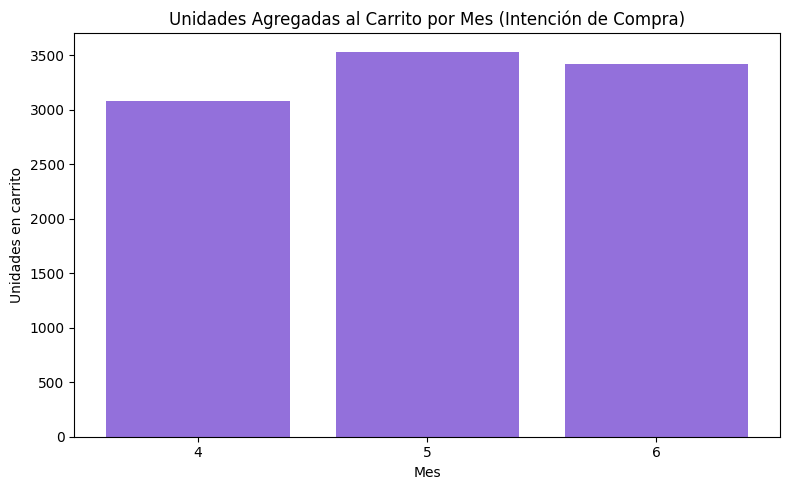

In [49]:
# Objetivo: Obtener y visualizar el total de unidades agregadas al carrito por mes.
# Este análisis refleja la intención de compra o el comportamiento de exploración.
# Los datos provienen de la tabla `Carrito`, y contabilizan
# el total de unidades que fueron agregadas, independientemente de si fueron posteriormente comprados.
# Útil para analizar el comportamiento mensual del cliente.
ventas_por_mes = (
    session.query(
        extract('month', Carrito.FechaAgregado).label("mes"),
        func.sum(Carrito.Cantidad)
    )
    .group_by("mes")
    .order_by("mes")
    .all()
)

df_ventas_mes = pd.DataFrame(ventas_por_mes, columns=["Mes", "TotalUnidades"])
df_ventas_mes["Mes"] = df_ventas_mes["Mes"].astype(int)


# Gráfico
plt.figure(figsize=(8, 5))
plt.bar(df_ventas_mes["Mes"], df_ventas_mes["TotalUnidades"], color='mediumpurple')
plt.title("Unidades Agregadas al Carrito por Mes (Intención de Compra)")
plt.xlabel("Mes")
plt.ylabel("Unidades en carrito")
plt.xticks(df_ventas_mes["Mes"]) 
plt.tight_layout()
plt.show()

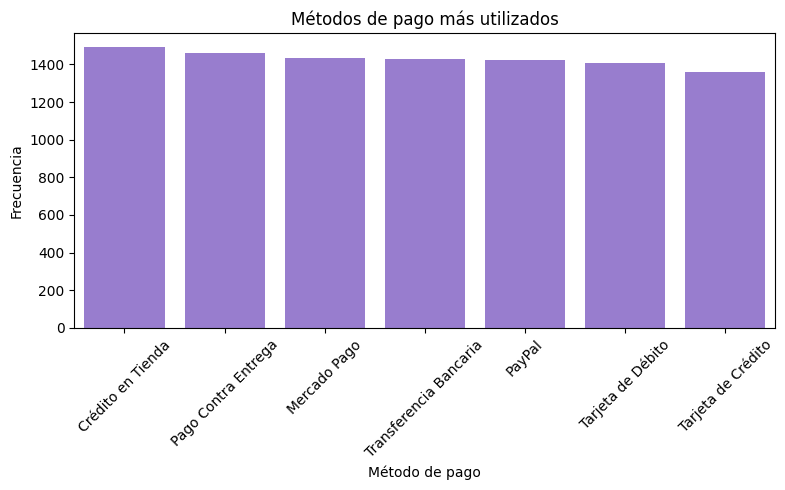

In [48]:
# Objetivo: Obtener los métodos de pago más frecuentes utilizados en las órdenes registradas.
# Este análisis permite identificar las preferencias de los clientes al momento de pagar 
# y porder decidir qué métodos promover o mantener activos.
Metodo_mas_utilizado = (
    session.query(
        MetodosPago.Nombre.label("Metodo"),
        func.count(OrdenesMetodosPago.MetodoPagoID).label("Frecuencia")
    )
    .join(OrdenesMetodosPago, MetodosPago.MetodoPagoID == OrdenesMetodosPago.MetodoPagoID)
    .group_by(MetodosPago.Nombre)
    .order_by(func.count(OrdenesMetodosPago.MetodoPagoID).desc())
    .all()
)

df_metodos = pd.DataFrame(Metodo_mas_utilizado, columns=["Metodo", "Frecuencia"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_metodos, x="Metodo", y="Frecuencia", color='mediumpurple')
plt.title("Métodos de pago más utilizados")
plt.xlabel("Método de pago")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

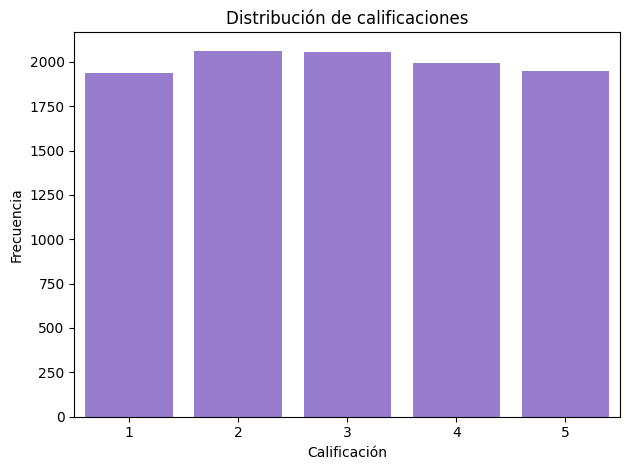

In [47]:
# Objetivo: Obtener y visualizar la frecuencia de cada calificación que los usuarios 
# han asignado a los productos en sus reseñas.
# Permite evaluar la percepción general de los productos por parte de los clientes.
calificaciones = (
    session.query(
    ReseñasProductos.Calificacion.label("Calificacion"),
    func.count(ReseñasProductos.Calificacion).label("Frecuencia")
    )
    .group_by(ReseñasProductos.Calificacion)
    .order_by(ReseñasProductos.Calificacion)
    .all()
) 
df_calificaciones = pd.DataFrame(calificaciones, columns=["Calificacion", "Frecuencia"])
#Gráfico
sns.barplot(data=df_calificaciones, x="Calificacion", y="Frecuencia", color='mediumpurple')
plt.title("Distribución de calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Mes con mayor monto pagado: 4 ($ 469415.61)


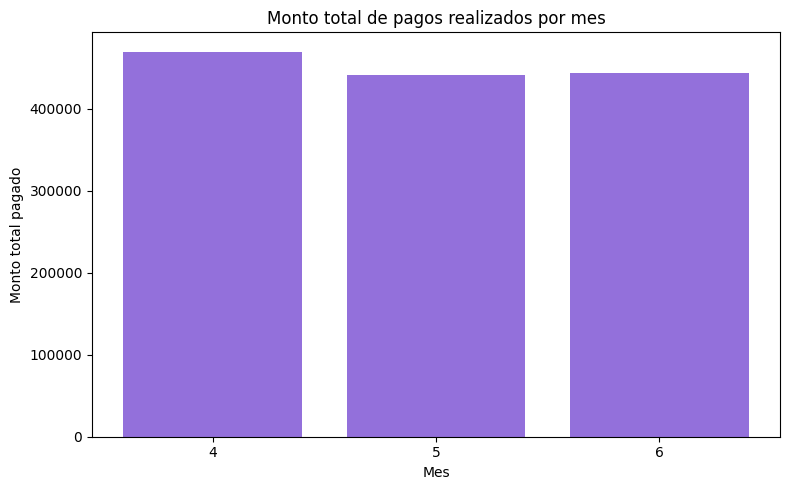

In [50]:
# Objetivo: Calcular y visualizar el monto total de pagos realizados por mes
# considerando únicamente aquellos que estén en estado "Pagado".
# Permite monitorear el flujo de ingresos a lo largo del año.
PagosPorMes= (
    session.query(
        extract('month', HistorialPagos.FechaPago).label("mes"),
        func.sum(HistorialPagos.Monto).label("MontoTotal")
    )
    .filter(HistorialPagos.EstadoPago == "Pagado")
    .group_by("mes")
    .order_by(func.sum(HistorialPagos.Monto).desc())
    .all()
)

df_pagos_mes = pd.DataFrame(PagosPorMes, columns=["Mes", "MontoTotal"])
df_pagos_mes["Mes"] = df_pagos_mes["Mes"].astype(int)

mes_max = df_pagos_mes.loc[df_pagos_mes["MontoTotal"].idxmax()]
print(f"Mes con mayor monto pagado: {mes_max['Mes']} ($ {mes_max['MontoTotal']:.2f})")

#Gráfico
plt.figure(figsize=(8, 5))
plt.bar(df_pagos_mes["Mes"], df_pagos_mes["MontoTotal"], color='mediumpurple')
plt.xlabel("Mes")
plt.ylabel("Monto total pagado")
plt.title("Monto total de pagos realizados por mes")
plt.xticks(df_pagos_mes["Mes"])
plt.tight_layout()
plt.show()

## Detectar valores nulos, duplicados, atípicos y otras inconsistencias.

In [51]:
#DataFrame Usuarios
# Calidad de datos en el DataFrame 'df_usuarios'
# Detectar valores faltantes, registros duplicados y datos con formato inconsistente

#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_usuarios.isnull().sum())

#Encontrar duplicados
duplicados = df_usuarios[df_usuarios.duplicated(subset=['dni', 'Email'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

#Encontrar datos inconsistentes 
# Evalúa si todos los correos tienen formato válido
email_inconsistentes = df_usuarios[~df_usuarios['Email'].str.contains('@', na=False)]
if email_inconsistentes.empty:
    print("\nNo hay emails con inconsistencias.")
else:
    print("\nEmails con inconsistencias encontrados:")
    print(email_inconsistentes)


Valores nulos por columna:
UsuarioID        0
Nombre           0
Apellido         0
dni              0
Email            0
Contraseña       0
FechaRegistro    0
dtype: int64

No hay duplicados encontrados.

No hay emails con inconsistencias.


Valores nulos por columna:
ProductoID     0
Nombre         0
Descripcion    0
Precio         0
Stock          0
CategoriaID    0
dtype: int64

No hay duplicados encontrados.

Valor de IQR
52.5
Cantidad de productos con stock fuera de rango: 3
Productos con stock fuera de rango (outliers):
['Camiseta Básica Hombre', 'Cuaderno Universitario 100h', 'Alcohol en Gel 500ml']


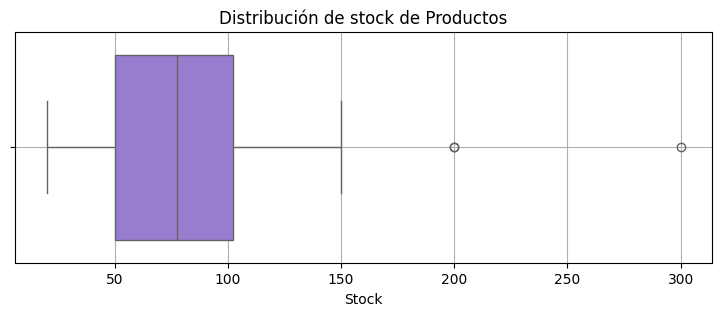

In [52]:
#DataFrame Productos
# Calidad de datos en el DataFrame 'df_productos'
# Detectar valores faltantes, registros duplicados, atípicos y datos con formato inconsistente

#Encontrar valores nulos 
print("Valores nulos por columna:")
print(df_productos.isnull().sum())

#Encontrar duplicados
duplicados = df_productos[df_productos.duplicated(subset=['ProductoID', 'Nombre'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)


#Calculo de cuartiles 
#Primer cuartil 
Q1 = df_productos['Stock'].quantile(0.25)

#Tercer cuartil
Q3= df_productos['Stock'].quantile(0.75)

# Interquartile Range IQR
IQR = Q3 - Q1

#Imprimir valor de IQR
print("\nValor de IQR")
print(IQR)

#Limites para outliers

#límite inferior 
lower_bound = Q1 - 1.5 * IQR
#Límite superior
upper_bound = Q3 + 1.5* IQR

#Calculo de outliers
outliers = df_productos[
    (df_productos['Stock'] < lower_bound) | (df_productos['Stock'] > upper_bound)
]

# Cantidad de outliers
print(f"Cantidad de productos con stock fuera de rango: {outliers.shape[0]}")

# Nombre de productos que son outliers
nombres_outliers = outliers['Nombre'].tolist()
print("Productos con stock fuera de rango (outliers):")
print(nombres_outliers)

#Grafico
plt.figure(figsize=(9, 3))
sns.boxplot(x=df_productos['Stock'], color="mediumpurple")
plt.title("Distribución de stock de Productos")
plt.ylabel
plt.grid(True)
plt.show()



In [53]:
#DataFrame Ordenes
# Calidad de datos en el DataFrame 'df_ordenes'
# Detectar valores faltantes, registros duplicados
#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_ordenes.isnull().sum())

#Encontrar duplicados
duplicados = df_ordenes[df_ordenes.duplicated(subset=['OrdenID', 'UsuarioID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

Valores nulos por columna:
OrdenID       0
UsuarioID     0
FechaOrden    0
Total         0
Estado        0
dtype: int64

No hay duplicados encontrados.


Valores nulos por columna:
DetalleID         0
OrdenID           0
ProductoID        0
Cantidad          0
PrecioUnitario    0
dtype: int64

No hay duplicados encontrados.

Valor de IQR
2.0
Cantidad de productos con unidades vendidas fuera de rango: 0
Ordenes con unidades vendidas fuera de rango (outliers):
[]


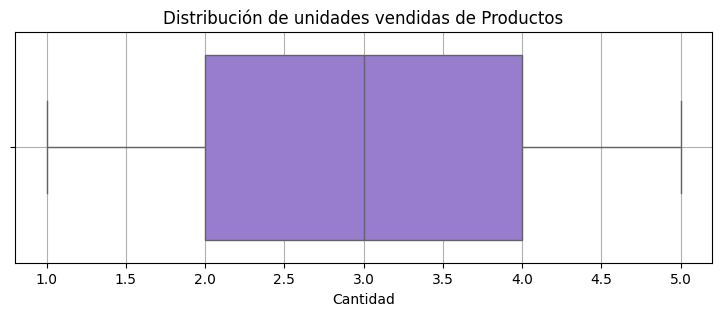

In [54]:
#DataFrame DetalleOrdenes
# Calidad de datos en el DataFrame 'df_detalle_ordenes'
# Detectar valores faltantes, registros duplicados y datos con formato inconsistente
#Encontrar valores nulos 
print("Valores nulos por columna:")
print(df_detalle_ordenes.isnull().sum())

#Encontrar duplicados
duplicados = df_detalle_ordenes[df_detalle_ordenes.duplicated(subset=['OrdenID', 'ProductoID', 'DetalleID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)



#Calculo de cuartiles 
#Primer cuartil 
Q1 = df_detalle_ordenes['Cantidad'].quantile(0.25)

#Tercer cuartil
Q3= df_detalle_ordenes['Cantidad'].quantile(0.75)

# Interquartile Range IQR
IQR = Q3 - Q1

#Imprimir valor de IQR
print("\nValor de IQR")
print(IQR)

#Limites para outliers

#límite inferior 
lower_bound = Q1 - 1.5 * IQR
#Límite superior
upper_bound = Q3 + 1.5* IQR

#Calculo de outliers
outliers = df_detalle_ordenes[
    (df_detalle_ordenes['Cantidad'] < lower_bound) | (df_detalle_ordenes['Cantidad'] > upper_bound)
]

# Cantidad de outliers
print(f"Cantidad de productos con unidades vendidas fuera de rango: {outliers.shape[0]}")

# Nombre de productos que son outliers
orden_outliers = outliers['OrdenID'].tolist()
print("Ordenes con unidades vendidas fuera de rango (outliers):")
print(orden_outliers)

#Grafico
plt.figure(figsize=(9, 3))
sns.boxplot(x=df_detalle_ordenes['Cantidad'], color="mediumpurple")
plt.title("Distribución de unidades vendidas de Productos")
plt.ylabel
plt.grid(True)
plt.show()


In [55]:
#DataFrame DireccionesEnvio
# Calidad de datos en el DataFrame 'df_direcciones_envio'
# Detectar valores faltantes, registros duplicados

#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_direcciones_envio.isnull().sum())

#Encontrar duplicados
duplicados = df_direcciones_envio[df_direcciones_envio.duplicated(subset=['DireccionID', 'UsuarioID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

Valores nulos por columna:
DireccionID     0
UsuarioID       0
Calle           0
Ciudad          0
Departamento    0
Provincia       0
Distrito        0
Estado          0
CodigoPostal    0
Pais            0
dtype: int64

No hay duplicados encontrados.


Valores nulos por columna:
CarritoID        0
UsuarioID        0
ProductoID       0
Cantidad         0
FechaAgregado    0
dtype: int64

No hay duplicados encontrados.

Valor de IQR
2.0
Cantidad de ordenes en carrito con unidades agregadas fuera de rango: 0
Ordenes en Carrito con unidades agregadas fuera de rango (outliers):
[]


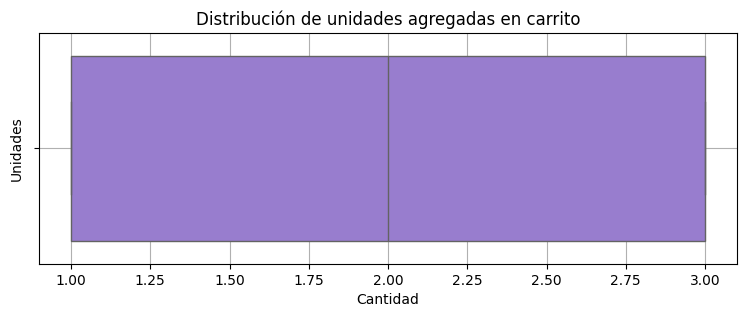

In [60]:
#DataFrame Carrito
# Calidad de datos en el DataFrame 'df_carrito'
# Detectar valores faltantes, registros duplicados y atípicos 
#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_carrito.isnull().sum())

#Encontrar duplicados
duplicados = df_carrito[df_carrito.duplicated(subset=['CarritoID', 'UsuarioID', 'ProductoID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

#Calculo de cuartiles 
#Primer cuartil 
Q1 = df_carrito['Cantidad'].quantile(0.25)

#Tercer cuartil
Q3= df_carrito['Cantidad'].quantile(0.75)

# Interquartile Range IQR
IQR = Q3 - Q1

#Imprimir valor de IQR
print("\nValor de IQR")
print(IQR)

#Limites para outliers

#límite inferior 
lower_bound = Q1 - 1.5 * IQR
#Límite superior
upper_bound = Q3 + 1.5* IQR

#Calculo de outliers
outliers = df_carrito[
    (df_carrito['Cantidad'] < lower_bound) | (df_carrito['Cantidad'] > upper_bound)
]

# Cantidad de outliers
print(f"Cantidad de ordenes en carrito con unidades agregadas fuera de rango: {outliers.shape[0]}")

# Id de carrito con outliers
carrito_outliers = outliers['CarritoID'].tolist()
print("Ordenes en Carrito con unidades agregadas fuera de rango (outliers):")
print(carrito_outliers)

#Grafico
plt.figure(figsize=(9, 3))
sns.boxplot(x=df_carrito['Cantidad'], color="mediumpurple")
plt.title("Distribución de unidades agregadas en carrito")
plt.ylabel("Unidades")
plt.grid(True)
plt.show()


Valores nulos por columna:
OrdenMetodoID    0
OrdenID          0
MetodoPagoID     0
MontoPagado      0
dtype: int64

No hay duplicados encontrados.

Valor de IQR
458.04999999999995
Cantidad de Montos pagados fuera de rango: 0
Cantidad de ordenes con montos de pago fuera de rango (outliers):
[]


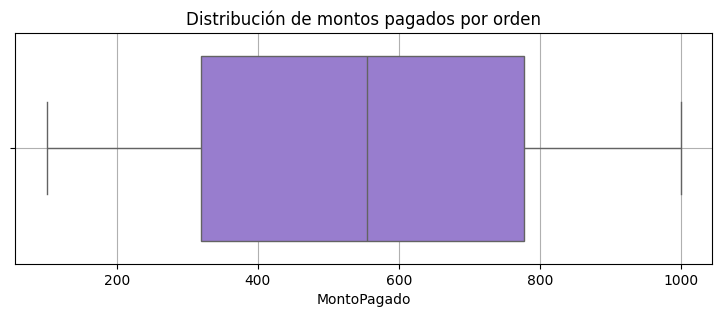

In [57]:
#DataFrame OrdenesMetodosPago
# Calidad de datos en el DataFrame 'df_metodos_pago'
# Detectar valores faltantes, registros duplicados y atípicos 
#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_ordenes_metodos_pago.isnull().sum())

#Encontrar duplicados
duplicados = df_ordenes_metodos_pago[df_ordenes_metodos_pago.duplicated(subset=['OrdenMetodoID', 'OrdenID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

#Calculo de cuartiles 
#Primer cuartil 
Q1 = df_ordenes_metodos_pago['MontoPagado'].quantile(0.25)

#Tercer cuartil
Q3= df_ordenes_metodos_pago['MontoPagado'].quantile(0.75)

# Interquartile Range IQR
IQR = Q3 - Q1

#Imprimir valor de IQR
print("\nValor de IQR")
print(IQR)

#Limites para outliers

#límite inferior 
lower_bound = Q1 - 1.5 * IQR
#Límite superior
upper_bound = Q3 + 1.5* IQR

#Calculo de outliers
outliers = df_ordenes_metodos_pago[
    (df_ordenes_metodos_pago['MontoPagado'] < lower_bound) | (df_ordenes_metodos_pago['MontoPagado'] > upper_bound)
]

# Cantidad de outliers
print(f"Cantidad de Montos pagados fuera de rango: {outliers.shape[0]}")

# ID ordenes con outliers
orden_outliers = outliers['OrdenMetodoID'].tolist()
print("Cantidad de ordenes con montos de pago fuera de rango (outliers):")
print(orden_outliers)

#Grafico
plt.figure(figsize=(9, 3))
sns.boxplot(x=df_ordenes_metodos_pago['MontoPagado'], color="mediumpurple")
plt.title("Distribución de montos pagados por orden")
plt.ylabel
plt.grid(True)
plt.show()

In [58]:
#DataFrame ReseñasProductos
# Calidad de datos en el DataFrame 'df_reseñas_productos'
# Detectar valores faltantes, registros duplicados 

#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_reseñas_productos.isnull().sum())

#Encontrar duplicados
duplicados = df_reseñas_productos[df_reseñas_productos.duplicated(subset=['ReseñaID', 'UsuarioID', 'ProductoID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

Valores nulos por columna:
ReseñaID        0
UsuarioID       0
ProductoID      0
Calificacion    0
Comentario      0
Fecha           0
dtype: int64

No hay duplicados encontrados.


In [59]:
#DataFrame HistorialPagos
# Calidad de datos en el DataFrame 'df_historial_pagos'
# Detectar valores faltantes, registros duplicados 

#Encontrar valores nulos
print("Valores nulos por columna:")
print(df_historial_pagos.isnull().sum())

#Encontrar duplicados
duplicados = df_historial_pagos[df_historial_pagos.duplicated(subset=['PagoID', 'OrdenID'], keep=False)]
if duplicados.empty:
    print("\nNo hay duplicados encontrados.")
else:
    print("\nDuplicados encontrados:")
    print(duplicados)

Valores nulos por columna:
PagoID          0
OrdenID         0
MetodoPagoID    0
Monto           0
FechaPago       0
EstadoPago      0
dtype: int64

No hay duplicados encontrados.


## Identificar claves primarias y foráneas implícitas, atributos principales y variables relevantes para el negocio.

1. Usuarios

| Elemento                  | Descripción                                           |
| ------------------------- | ----------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                      |
| **Atributos principales** | `Nombre`, `Apellido`, `dni`, `Email`, `FechaRegistro` |
| **Variables de negocio**  | `FechaRegistro` (segmentación por antigüedad)         |

2. Productos

| Elemento                  | Descripción                                                              |
| ------------------------- | ------------------------------------------------------------------------ |
| **Clave primaria**        | `ID` (implícita)                                                         |
| **Atributos principales** | `Nombre`, `Descripción`, `Categoria`, `PrecioUnitario`, `Stock`         |
| **Variables de negocio**  | `PrecioUnitario`, `Stock` (gestión de inventario, historial de precios) |

3. Categorias

| Elemento                  | Descripción                                                 |
| ------------------------- | ----------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                            |
| **Atributos principales** | `Nombre`, `Descripción`                                     |
| **Variables de negocio**  | `Nombre` (análisis de productos más vendidos por categoría) |

4. Carrito

| Elemento                  | Descripción                                              |
| ------------------------- | -------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                         |
| **Claves foráneas**       | `UsuarioID` → Usuarios.ID<br>`ProductoID` → Productos.ID |
| **Atributos principales** | `Cantidad`, `FechaAgregado`                              |
| **Variables de negocio**  | `Cantidad` (productos agregados al carrito)              |

5. Ordenes

| Elemento                  | Descripción                                                         |
| ------------------------- | ------------------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                                    |
| **Clave foránea**         | `UsuarioID` → Usuarios.ID                                           |
| **Atributos principales** | `FechaOrden`, `Estado`, `Total`                                     |
| **Variables de negocio**  | `Total`, `Estado`, `FechaOrden` (análisis de ventas y temporalidad) |

6. DetalleOrdenes: 

| Elemento                  | Descripción                                                      |
| ------------------------- | ---------------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                                 |
| **Claves foráneas**       | `OrdenID` → Órdenes.ID<br>`ProductoID` → Productos.ID            |
| **Atributos principales** | `Cantidad`, `Precio unitario`                                    |
| **Variables de negocio**  | `Cantidad`, `Precio unitario` (detalle de ingresos por producto) |

7. MetodosPago

| Elemento                  | Descripción                                           |
| ------------------------- | ----------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                      |
| **Atributos principales** | `Nombre`, `Descripción`                               |
| **Variables de negocio**  | `Nombre` (análisis de preferencia de métodos de pago) |

8. OrdenesMetodosPago

| Elemento                  | Descripción                                               |
| ------------------------- | --------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                          |
| **Claves foráneas**       | `OrdenID` → Órdenes.ID<br>`MetodoPagoID` → MétodosPago.ID |
| **Atributos principales** | `MontoPagado`                                             |
| **Variables de negocio**  | `MontoPagado` (ingresos por método de pago)               |

9. HistorialPago

| Elemento                  | Descripción                                                             |
| ------------------------- | ----------------------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                                        |
| **Claves foráneas**       | `OrdenID` → Órdenes.ID<br>`MetodoPagoID` → MétodosPago.ID               |
| **Atributos principales** | `Monto`, `FechaPago`, `EstadoPago`                                      |
| **Variables de negocio**  | `Monto`, `FechaPago`, `EstadoPago` (análisis financiero y cumplimiento) |

10. ReseñasProductos

| Elemento                  | Descripción                                                      |
| ------------------------- | ---------------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                                 |
| **Claves foráneas**       | `UsuarioID` → Usuarios.ID<br>`ProductoID` → Productos.ID         |
| **Atributos principales** | `Calificación`, `Comentario`, `Fecha`                            |
| **Variables de negocio**  | `Calificación` (indicador de calidad y satisfacción del cliente) |

11. DireccionesEnvio 

| Elemento                  | Descripción                                                                                  |
| ------------------------- | -------------------------------------------------------------------------------------------- |
| **Clave primaria**        | `ID` (implícita)                                                                             |
| **Clave foránea**         | `UsuarioID` → Usuarios.ID                                                                    |
| **Atributos principales** | `Calle`, `Ciudad`, `Departamento`, `Provincia`, `Distrito`, `Estado`, `CodigoPostal`, `Pais` |
| **Variables de negocio**  | `Pais`, `Estado`, `Ciudad` (análisis logístico)                                              |


## Proponer y documentar acciones de preprocesamiento y corrección de calidad de datos.

Se llevó a cabo una revisión del conjunto de dato, enfocada en asegurar su integridad y calidad. Las validaciones incluyeron:

- **Verificación de valores nulos** por columna usando `df.isnull().sum()`.
- **Detección de duplicados** en campos clave 
- **Evaluación del formato de correos electrónicos**, asegurando la presencia del carácter `'@'`.
- **Revisión de valores atípicos** en variables numéricas como `Cantidad`, `Stock`, y `MontoPagado`.

#### Resultado

- Tras realizar todas las verificaciones, **no se detectaron valores nulos, duplicados, inconsistencias de formato, valores atípicos ni errores de integridad referencial**.  
- Los datos se encuentran en **buen estado** y son adecuados para su análisis, visualización y modelado.
